In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

babyA


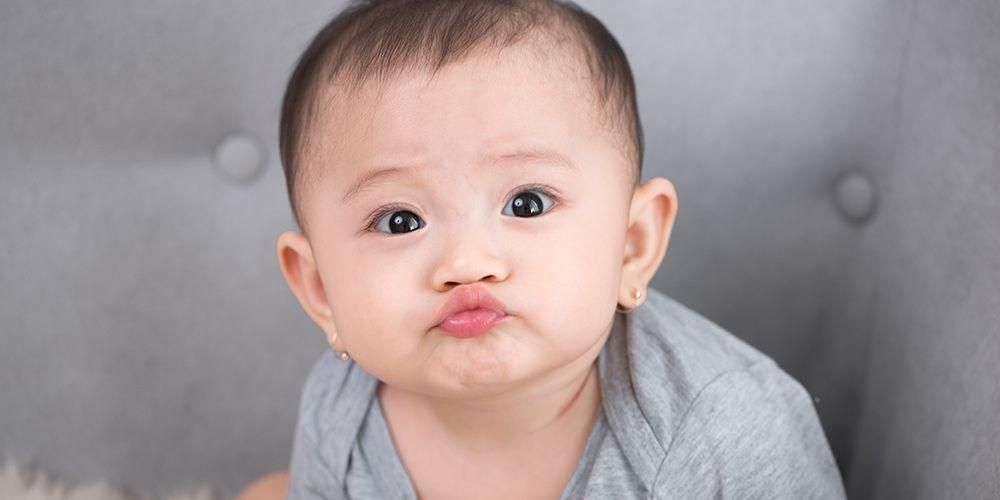

babyB


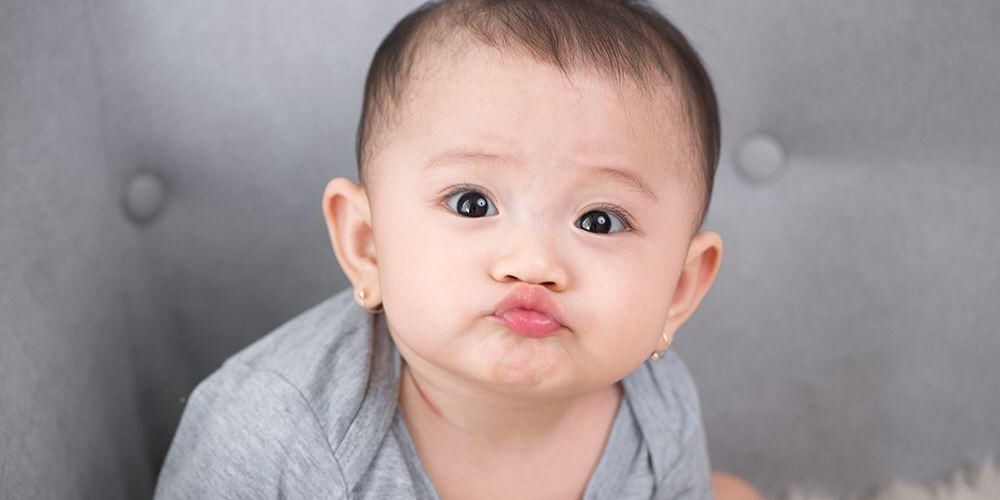

In [ ]:
# menggunakan 2 citra yang berbeda
babyA = cv2.imread("/content/baby.jpg")
print("babyA")
cv2_imshow(babyA)
babyB = cv2.imread("/content/baby mirror.jpg")
print("babyB")
cv2_imshow(babyB)

gabungan


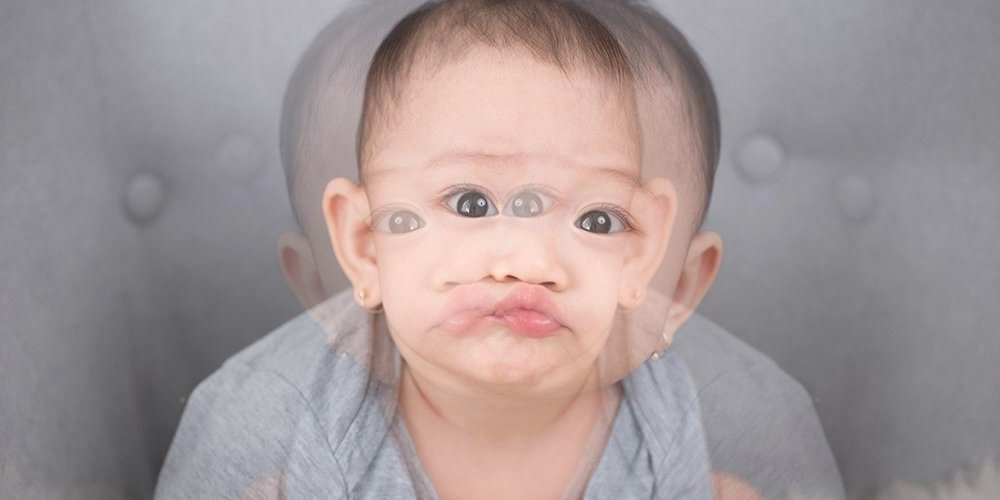

In [ ]:
# menentukan nilai alpha dan betha
alpha = 0.30
beta = 0.70
# menggabungkan citra
babyC = cv2.addWeighted(babyA, alpha, babyB, beta, 0.0)
#menampilkan citra
print('gabungan')
cv2_imshow(babyC)

In [ ]:
# similaritas
from skimage import io
from skimage.metrics import structural_similarity as ssim

In [ ]:
babyA = io.imread("/content/baby.jpg")
babyC = io.imread("/content/babyC.png")

In [ ]:
# perbandingan similaritas
ssim_1 = ssim(babyA, babyA, data_range=babyA.max() - babyA.min(), multichannel=True)
ssim_2 = ssim(babyC, babyC, data_range=babyC.max() - babyC.min(), multichannel=True)
ssim_beda = ssim(babyA, babyC, data_range=babyC.max() - babyA.min(), multichannel=True)
print(ssim_1, ssim_2, ssim_beda)

1.0 1.0 0.8152568113905078


In [ ]:
babyB = io.imread("/content/baby mirror.jpg")
babyC = io.imread("/content/babyC.png")

In [ ]:
# perbandingan similaritas
ssim_1 = ssim(babyB, babyB, data_range=babyB.max() - babyB.min(), multichannel=True)
ssim_2 = ssim(babyC, babyC, data_range=babyC.max() - babyC.min(), multichannel=True)
ssim_beda = ssim(babyB, babyC, data_range=babyC.max() - babyB.min(), multichannel=True)
print(ssim_1, ssim_2, ssim_beda)

1.0 1.0 0.9490684565591946


In [ ]:
# mengubah kontras
import cv2
import numpy as np
from skimage import io
from pylab import *

In [ ]:
# membaca gambar 1
baby1 = cv2.imread("/content/baby.jpg")
b,g,r = cv2.split(baby1)
baby1 = cv2.merge((r,g,b))

# membuat tiruan kontras
babykontras = np.zeros(baby1.shape, baby1.dtype)

In [ ]:
# nilai kontras dan kecerahan
contras = 3.0
bright = 2

# mengubah nilai kontras dan kecerahan
for y in range(baby1.shape[0]):
  for x in range(baby1.shape[1]):
    for c in range(baby1.shape[2]):
      babykontras[y,x,c] = np.clip(contras*baby1[y,x,c] + bright, 0, 255)

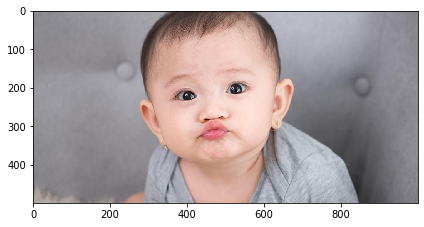

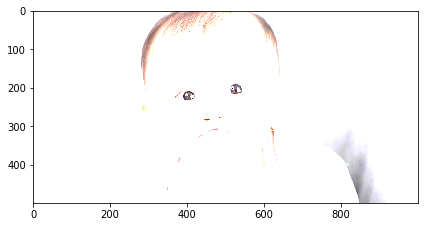

In [ ]:
figure(0)
io.imshow(baby1)
figure(1)
io.imshow(babykontras)

In [ ]:
# membaca citra yang sama untuk teknik penghalusan berbeda
babyC1 = cv2.imread('/content/babyC.png')
b,g,r = cv2.split(babyC1)
babyC1 = cv2.merge((r,g,b))

babyC2 = cv2.imread('/content/babyC.png')
b,g,r = cv2.split(babyC2)
babyC2 = cv2.merge((r,g,b))

babyC3 = cv2.imread('/content/babyC.png')
b,g,r = cv2.split(babyC3)
babyC3 = cv2.merge((r,g,b))

babyC4 = cv2.imread('/content/babyC.png')
b,g,r = cv2.split(babyC4)
babyC4 = cv2.merge((r,g,b))

# menghaluskan citra
image_MedianBlur = cv2.medianBlur(babyC2, 9)
image_GaussianBlur = cv2.GaussianBlur(babyC3, (9,9), 10)
image_BilateralBlur = cv2.bilateralFilter(babyC4, 9, 100, 75)

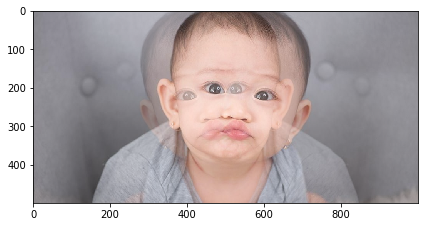

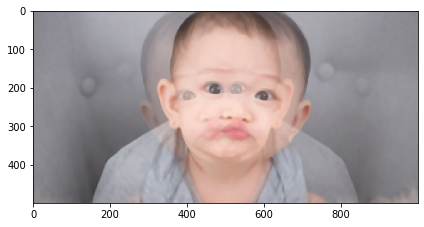

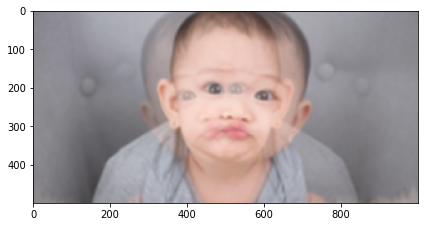

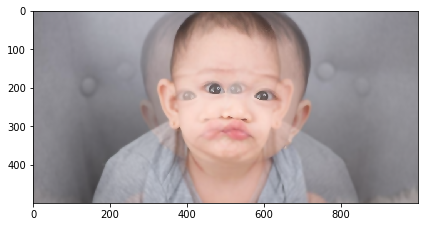

In [ ]:
# tampilan gambar
figure(0)
io.imshow(babyC1)

figure(1)
io.imshow(image_MedianBlur)

figure(2)
io.imshow(image_GaussianBlur)

figure(3)
io.imshow(image_BilateralBlur)

In [1]:
%%time
import cv2
import numpy as np
from skimage import io 
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

CPU times: user 264 ms, sys: 180 ms, total: 444 ms
Wall time: 755 ms


In [2]:
#gambar 1
img= cv2.imread('/baby1.jpg', 0)

rows, cols = img.shape

#similaritas
noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *=-1

Text(0.5, 1.0, 'citra C BB')

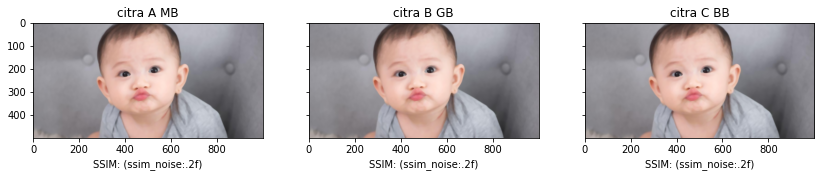

In [3]:
img_noise = img + noise
img_const = img + abs(noise)

ssim_none = ssim(img, img, data_range=img.max() - img.min())
ssim_noise = ssim(img, img_noise, data_range=img_noise.max() - img_noise.min())

#sublot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 7), sharex=True, sharey=True) 
ax = axes.ravel()
#menghaluskan citra / bluring
imgc1 = cv2.imread('/baby1.jpg')
rgb1 = cv2.cvtColor(imgc1, cv2.COLOR_BGR2RGB)

imgmb1 = cv2.medianBlur(rgb1, 9)
imggb1 = cv2.GaussianBlur(rgb1, (9,9), 10)
imgbf1 = cv2.bilateralFilter(rgb1, 9, 100, 75)

#citra median blur
ax[0].imshow(imgmb1, vmin=0, vmax=200)
ax[0].set_xlabel(f'SSIM: (ssim_noise:.2f)')
ax[0].set_title('citra A MB')

#citra Gaussian blur
ax[1].imshow(imgmb1, vmin=0, vmax=200)
ax[1].set_xlabel(f'SSIM: (ssim_noise:.2f)')
ax[1].set_title('citra B GB')

#citra median blur
ax[2].imshow(imgmb1, vmin=0, vmax=200)
ax[2].set_xlabel(f'SSIM: (ssim_noise:.2f)')
ax[2].set_title('citra C BB')

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as pyplot
from google.colab.patches import cv2_imshow

In [7]:
def extraxt_sift_features(img):
  sift_initialize = cv2.xfeatures2d.SIFT_create()
  key_points, descriptors = sift_initialize.detectAndCompute(img, None)
  return key_points. descriptors

In [8]:
def showing_sift_features(img1, img2, img3, key_points):
  return plt.imshow(cv2.drawKeypoints(img1, img2, key_points, img3.copy()))

In [16]:
#read image
x = input("Nama Img pertama: ")
Image1 = cv2.imread("baby1.jpg")
y = input("Nama Img kedua: ")
Image2 = cv2.imread("baby2.jpg")
z = input("Nama Img ketiga: ")
Image3 = input("baby3.png")

#convert to greyscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

#create SIFT feature extractor
sift_initialize = cv2.xfeatures2d.SIFT_create()

#detect features from the image
img1_key_points, img1_descriptors = sift_initialize.detectAndCompute(gray1,None)
img2_key_points, img2_descriptors = sift_initialize.detectAndCompute(gray2,None)
img3_key_points, img3_descriptors = sift_initialize.detectAndCompute(gray3,None)

#draw the detected key points
sift_image = cv2.drawKeypoints(gray1, img1_key_points, img1)


#show the image
print('Display')
plt.imshow(cv2.drawKeypoints(gray1, img1_key_points, img1))

KeyboardInterrupt: ignored